# Exercises Solutions for Frequentist Inference (6.-11.)

## Dorothea Müller

The following script is the solution the exercises for the frequentist inference section (ie. the exercises 6-11) of the course 'Statistics for Data Science' (WS 19/20) by Prof. Ostwald. The exercise sheets can be found at the website https://www.ewi-psy.fu-berlin.de/einrichtungen/arbeitsbereiche/computational_cogni_neurosc/teaching/Statistics_for_Data_Science_19_20.html.

## Configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

%matplotlib inline

In [2]:
# For reproducibility, fix seed.
np.random.seed(42)

## 6. Foundations and Maximum Likelihood

### 1. Fisher scoring algorithm for the maximum likelihood estimation

**Analytical Results**

The linear regression has the form of 
$y = b^{T}x + \epsilon$ where the first element of the vector x is additionally added with a value of 1 to account for the intercept. The error is assumed to be distributed with \~N(0, $\sigma$). The regression can thus be rewritten as \~N(XW, $\sigma$). Expressed as a conditional probability density model, it becomes:

\begin{aligned}
p(y∣x,\theta)=(y∣μ(x),\sigma^{2}(x)).
\end{aligned}

Thus, taking the negative log-likelihood results in
\begin{aligned}
NL(\theta) &= -\sum_{i=1}^{n}log p(y_{i} | x_{i}, \theta) \\
\end{aligned}
Thus, $\hat{\beta} = (X^{T}X)^{-1}X^{T}y$

(See also https://medium.com/quick-code/maximum-likelihood-estimation-for-regression-65f9c99f815d and https://www.quantstart.com/articles/Maximum-Likelihood-Estimation-for-Linear-Regression for the derivation).

**Data Generation**

In [3]:
def generate_linear_relation(up_to, n, a, b):
    """
    Generates x, y with a linear relation y = a*x + b + Gaussian noise.
    
    Args:
        up_to: generates samples from 0 to up_to
        n: number of sampled datapoints
        a: slope
        b: intercept
        
    Returns:
        x, y
    """
    data = np.zeros(shape = (up_to, 2))
    for i, sample in enumerate(data):
        y = a * i + b + np.random.normal(0, 10)
        data[i, 0] = i
        data[i, 1] = y
    
    idx = np.random.choice(data.shape[0], n, replace = False)
    data = data[idx]
    
    return data[:, 0], data[:, 1]

In [4]:
# Parameters for generation y = a*x + b
np.random.seed(23)
upper = 100
n = 100
a = 1
b = 10
x, y = generate_linear_relation(upper, n, a, b)
X = np.vstack((x,y)).T

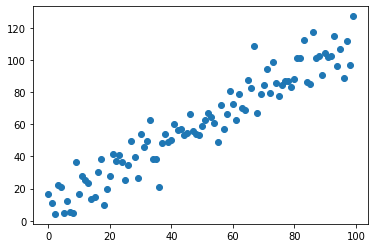

In [5]:
plt.scatter(x, y)

In [6]:
# Ground truth.
beta = np.linalg.inv(X.T@X)@X.T@y
beta.shape

(2,)

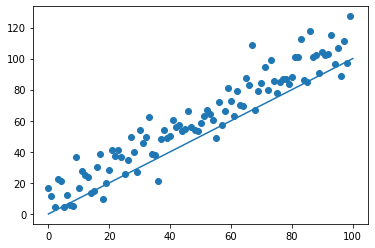

In [7]:
all_ = np.linspace(0, 100, 101)
plt.scatter(x, y)
plt.plot(all_, beta[1] * all_)

### Q: the intercept is not correctly calculated?

**Fisher Scoring Algorithm**

As this exercise is too hard (as discussed in the tutorial), I will abort it at this point (and delete the fruitless approaches I did here). 

### 2. Numerical Maximum Likelihood for Bernoulli Random Variables

The derivative for the log likelihood for the Bernoulli with $~B(\mu)$ is:

$ \frac{\delta} {\delta \mu} ln(x) = \frac{1}{\mu}\sum_{i}^{n}x_{i}-\frac{1}{1-\mu}(n-\sum_{i}^{n}x_{i})$

and the second derivative is:

$ \frac{\delta^{2}}{\delta \mu^{2}} ln(x) = -\frac{1}{\mu^{2}}\sum_{i}^{n}x_{i}-\frac{1}{(1-\mu)^{2}}(n-\sum_{i}^{n}x_{i})$.

For optimization, we will use the Newton-Raphson method.


In [8]:
def newton_raphson(data, n, theta):
    all_thetas = []
    all_thetas.append(theta) # Track initial condition.
    
    eps = 0.000001
    f_1 = lambda x : (1/(x+eps)) * np.sum(data) - 1/(1-(x+eps)) * (n - np.sum(data))
    f_2 = lambda x : -1/((x+eps)**2) * np.sum(data) - 1/((1-(x+eps))** 2) * (n - np.sum(data))
    
    stop = False
    
    while(not np.allclose(f_1(theta), 0, 0.0001)):
        
        theta = theta - f_1(theta)/f_2(theta)
        
        # Bound theta to be probability.
        if theta < 0:
            theta = 0.0
            stop = True
        elif theta > 1:
            theta = 1.0
            stop = True
            
        all_thetas.append(theta)
        if stop:
            break
    
    return all_thetas

In [9]:
n = 20
all_mu = [0.7, 1.0]

For mu: 0.7
Optimal parameter according to max. log likelihood: 0.75
Optimal parameter according to Newton-Raphson: 0.749999


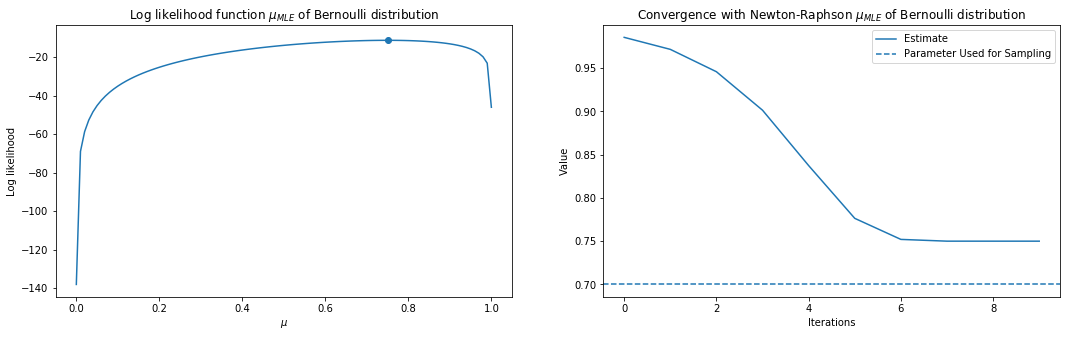

For mu: 1.0
Optimal parameter according to max. log likelihood: 1.0
Optimal parameter according to Newton-Raphson: 1.0


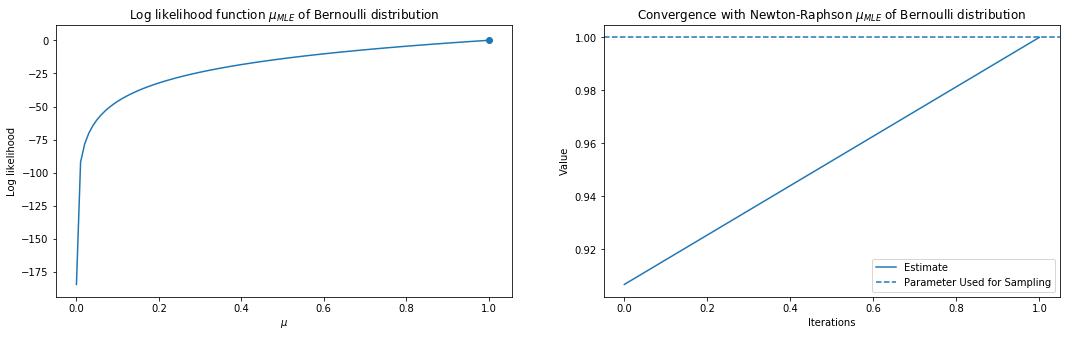

In [10]:
for mu in all_mu:
    sample = np.random.binomial(1, mu, n)
    
    # Likelihood estimation
    eps = 0.0001 #For not diving by 0.
    f = lambda x : np.log(x+eps) * np.sum(sample) + np.log(1-x+eps) * (n - np.sum(sample))
    thetas = np.linspace(0, 1, 101)
    
    # Newton-Raphson
    initial_theta = np.random.random()
    est_mu = newton_raphson(sample, n, initial_theta)
    
    # Plotting.
    fig, axs = plt.subplots(1, 2, figsize =(18, 5))
    
    axs[0].plot(thetas, f(thetas))
    axs[0].set_title("Log likelihood function $\mu_{MLE}$ of Bernoulli distribution")
    axs[0].set_xlabel("$\mu$")
    axs[0].set_ylabel("Log likelihood")
    theta_star = np.argmax(f(thetas))
    axs[0].scatter(np.array(theta_star/100), np.array(f(theta_star/100)))
    
    print(f"For mu: {mu}")
    print(f"Optimal parameter according to max. log likelihood: {theta_star/100}")
    print(f"Optimal parameter according to Newton-Raphson: {est_mu[-1]}")
    
    # Show convergence.
    axs[1].plot(est_mu, label = 'Estimate')
    axs[1].set_xlabel('Iterations')
    axs[1].set_ylabel('Value')
    axs[1].set_title('Convergence with Newton-Raphson $\mu_{MLE}$ of Bernoulli distribution')
    axs[1].axhline(mu, linestyle = 'dashed', label = 'Parameter Used for Sampling')
    axs[1].legend()
    plt.show();

**Interpretation**

The Newton-Raphson method converges to the maximum $\mu$ value of the log liklihood function.

### 3. Distribution of Maximum Likelihood Estimator

In [11]:
m_exp = 10000
n = 1000
thetas = np.linspace(0, 1, 101) # All possible estimates.
est = np.zeros(m_exp)
est_newton = np.zeros(m_exp)
mu = 0.7

In [12]:
for i in range(m_exp):
    sample = np.random.binomial(1, mu, n)
    
    # Likelihood estimation    
    mu_exp = np.argmax(f(thetas))/100
    est[i] = mu_exp
    
    est_newton[i] = newton_raphson(sample, n, initial_theta)[-1]

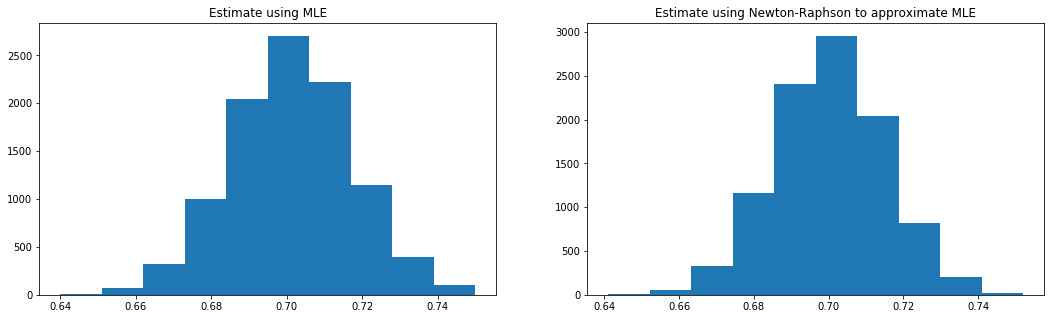

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (18, 5))
axs[0].hist(est)
axs[0].set_title("Estimate using MLE")
axs[1].hist(est_newton)
axs[1].set_title("Estimate using Newton-Raphson to approximate MLE");

**Observation**

The MLE are normal distributed around the true parameter $\mu$ for both the direct MLE and the estimate using Newton-Raphson.

## 7. Finite-sample estimator

### 1. (Un-)biasedness for Normal Distribution

In [14]:
n = 100
mean_ = 0
std_dev = 10
var = std_dev ** 2
sample = np.random.normal(mean_, std_dev, n)

In [15]:
all_means = np.zeros(n)
all_var = np.zeros(n)
all_std_dev = np.zeros(n)

for i in range(2, n):
    all_means[i] = np.mean(sample[:i])
    all_var[i] = np.var(sample[:i], ddof=1)
    all_std_dev[i] = np.std(sample[:i], ddof=1)

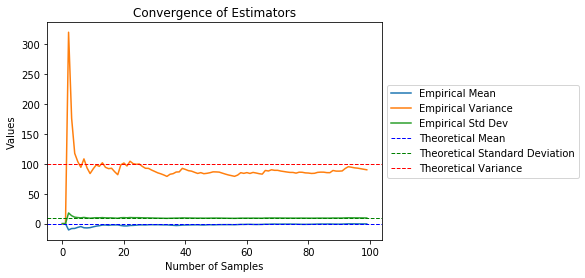

In [16]:
plt.plot(all_means, label = 'Empirical Mean')
plt.plot(all_var, label = 'Empirical Variance')
plt.plot(all_std_dev, label = 'Empirical Std Dev')
plt.xlabel("Number of Samples")
plt.ylabel("Values")
plt.axhline(mean_, color='blue', linestyle='dashed', linewidth=1, label = 'Theoretical Mean')
plt.axhline(std_dev, color = 'green', linestyle='dashed', linewidth=1, label = 'Theoretical Standard Deviation')
plt.axhline(var, color = 'red', linestyle='dashed', linewidth=1, label = 'Theoretical Variance')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"Convergence of Estimators");

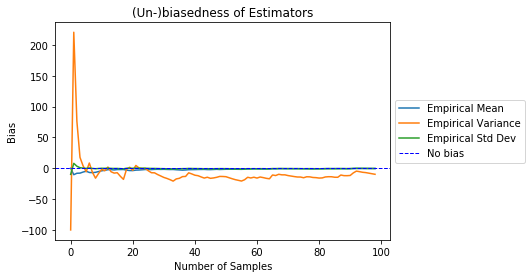

In [17]:
from_ = 1
plt.plot(all_means[from_:] - mean_, label = 'Empirical Mean')
plt.plot(all_var[from_:] - var, label = 'Empirical Variance')
plt.plot(all_std_dev[from_:] - std_dev, label = 'Empirical Std Dev')
plt.xlabel("Number of Samples")
plt.ylabel("Bias")
plt.axhline(0, color='blue', linestyle='dashed', linewidth=1, label = 'No bias')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"(Un-)biasedness of Estimators");

In [18]:
print(f"Mean true: {mean_}, empirical: {all_means[-1]}\nVar true {var}, empirical {all_var[-1]}\n" \
      f"Std Dev true {std_dev}, empirical {all_std_dev[-1]}")

Mean true: 0, empirical: -0.4005160936372373
Var true 100, empirical 90.1722595538619
Std Dev true 10, empirical 9.495907516075643


The bias is not clearly visible in the data, so maybe taking a larger sample size might reduce the noise and show the bias more clearly:

In [19]:
n = 10000000
mean_ = 0
std_dev = 10
var = std_dev ** 2
sample = np.random.normal(mean_, std_dev, n)

In [20]:
mean_emp = np.mean(sample)
# Provide degrees of freedom to get to 1/n-1
var_emp = np.var(sample, ddof=1)
std_dev_emp = np.std(sample, ddof=1)

In [21]:
print(f"Mean true: {mean_}, empirical: {mean_emp}\nVar true {var}, empirical {var_emp}\n" \
      f"Std Dev true {std_dev}, empirical {std_dev_emp}")

Mean true: 0, empirical: 0.00028520084152331657
Var true 100, empirical 100.00917693160461
Std Dev true 10, empirical 10.000458836053705


In [22]:
print(f"Mean true: {mean_/mean_emp}\nVar {var/var_emp}\n" \
      f"Std Dev {std_dev/std_dev_emp}")

Mean true: 0.0
Var 0.9999082391047884
Std Dev 0.9999541184998382


Although we expected the standard deviation to be biased and the variance to not be biased, it was not possible to show this.

In [23]:
# TODO: TODO: biasednessofthemaximumlikeliho o dvarianceparameterestimator

### 2. (Un-)Biasedness for Binomial Distribution

In [24]:
# TODO

### 3. Bias-variance decompositions

In [25]:
### TODo: redo this exercise.


## 8. Asymptotic Estimator Properties 

## 10. Hypothesis Testing

### 1. T test is Exact Test

In [36]:
n = 100
mu_1 = 10
std_dev_1 = 1
mu_2 = 20
std_dev_2 = 5
sample_1 = np.random.normal(mu, std_dev, n)
sample_2 = np.random.normal(mu_2, std_dev, n)

In [38]:
sample_1.shape

(100,)

In [39]:
# For two-sided test.

In [40]:
v1 = np.var(sample_1, ddof=1)
v2 = np.var(sample_2, ddof=1)
v1

0.936576493378173

In [ ]:
#### Copied from scipy code; todo: replace

In [41]:
def _unequal_var_ttest_denom(v1, n1, v2, n2):
    vn1 = v1 / n1
    vn2 = v2 / n2
    with np.errstate(divide='ignore', invalid='ignore'):
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))

    # If df is undefined, variances are zero (assumes n1 > 0 & n2 > 0).
    # Hence it doesn't matter what df is as long as it's not NaN.
    df = np.where(np.isnan(df), 1, df)
    denom = np.sqrt(vn1 + vn2)
    return df, denom


def _equal_var_ttest_denom(v1, n1, v2, n2):
    df = n1 + n2 - 2.0
    svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
    denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    return df, denom

In [42]:
def _ttest_ind_from_stats(mean1, mean2, denom, df):

    d = mean1 - mean2
    with np.errstate(divide='ignore', invalid='ignore'):
        t = np.divide(d, denom)
    t, prob = _ttest_finish(df, t)

    return (t, prob)

In [43]:
def _ttest_finish(df, t):
    """Common code between all 3 t-test functions."""
    prob = distributions.t.sf(np.abs(t), df) * 2  # use np.abs to get upper tail
    if t.ndim == 0:
        t = t[()]

    return t, prob

In [45]:
if equal_var:
    df, denom = _equal_var_ttest_denom(v1, n1, v2, n2)
else:
    df, denom = _unequal_var_ttest_denom(v1, n1, v2, n2)

res = _ttest_ind_from_stats(np.mean(a, axis), np.mean(b, axis), denom, df

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)